## 数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load data 
km = pd.read_csv(r"./data/clean/km_house_FE.csv")
cd = pd.read_csv(r"./data/clean/cd_house_FE.csv")
hz = pd.read_csv(r"./data/clean/hz_house_FE.csv")
sh = pd.read_csv(r"./data/clean/sh_house_FE.csv")

house_all = pd.read_csv(r"./data/houses_all.csv")

In [3]:
house_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9539 entries, 0 to 9538
Data columns (total 14 columns):
region           9539 non-null object
city             9539 non-null object
rooms            9539 non-null int64
halls            9539 non-null int64
towards          9539 non-null object
decoration       9539 non-null int64
have_elevator    9539 non-null int64
visited          9539 non-null int64
attention        9539 non-null int64
publishday       9539 non-null float64
popular          9539 non-null float64
unit_price       9539 non-null float64
area             9539 non-null float64
total_price      8834 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 1.0+ MB


In [4]:
house_all.sample(3)

,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
5335,华元十六街区,H,1,1,S,0,1,1,3,20.0,0.0800,1.4286,44.10,NaN
2442,蓝光富丽城,C,3,2,S,0,1,3,14,18.5,0.3405,1.5369,120.38,185.0
3972,金帝海珀二期,H,3,2,S,1,1,12,22,20.0,0.7500,2.4930,88.25,220.0


In [5]:
# # 删除region 列
# house_all.drop("region", axis=1, inplace=True)

In [6]:
# 添加新特征id
house_id = pd.Series(np.array(np.arange(1, house_all.shape[0]+1)),dtype='int64')
# house_id[-5:]
house_all['id'] = house_id

In [7]:
house_all['id'].tail()

9534    9535
9535    9536
9536    9537
9537    9538
9538    9539
Name: id, dtype: int64

In [8]:
house_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9539 entries, 0 to 9538
Data columns (total 15 columns):
region           9539 non-null object
city             9539 non-null object
rooms            9539 non-null int64
halls            9539 non-null int64
towards          9539 non-null object
decoration       9539 non-null int64
have_elevator    9539 non-null int64
visited          9539 non-null int64
attention        9539 non-null int64
publishday       9539 non-null float64
popular          9539 non-null float64
unit_price       9539 non-null float64
area             9539 non-null float64
total_price      8834 non-null float64
id               9539 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.1+ MB


In [9]:
# 新的列索引
new_cols=['id','region','city','rooms','halls','towards','decoration','have_elevator','visited','attention','publishday','popular','unit_price','area','total_price']
# 重新摆放列的位置
house_all = pd.DataFrame(data=house_all, columns=new_cols)

In [10]:
house_all.sample()

,id,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
4485,4486,嘉绿北苑,H,3,2,S,2,0,3,81,20.0,1.32,3.7904,124.0,470.0


In [11]:
# write into csv file
# house_all.to_csv(r"./model_data/houses_all_set.csv", index=False)

In [12]:
# 删除 'region' 列
# house_all.drop("region", axis=1, inplace=True)

In [13]:
house_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9539 entries, 0 to 9538
Data columns (total 15 columns):
id               9539 non-null int64
region           9539 non-null object
city             9539 non-null object
rooms            9539 non-null int64
halls            9539 non-null int64
towards          9539 non-null object
decoration       9539 non-null int64
have_elevator    9539 non-null int64
visited          9539 non-null int64
attention        9539 non-null int64
publishday       9539 non-null float64
popular          9539 non-null float64
unit_price       9539 non-null float64
area             9539 non-null float64
total_price      8834 non-null float64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.1+ MB


In [14]:
# 分离训练集和测试集，分离标准为 'total_price' 列是否为空
house_train = house_all[house_all.total_price.notnull()]
house_test = house_all[house_all.total_price.isnull()]

In [15]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 1 to 9538
Data columns (total 15 columns):
id               8834 non-null int64
region           8834 non-null object
city             8834 non-null object
rooms            8834 non-null int64
halls            8834 non-null int64
towards          8834 non-null object
decoration       8834 non-null int64
have_elevator    8834 non-null int64
visited          8834 non-null int64
attention        8834 non-null int64
publishday       8834 non-null float64
popular          8834 non-null float64
unit_price       8834 non-null float64
area             8834 non-null float64
total_price      8834 non-null float64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.1+ MB


In [16]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 9330
Data columns (total 15 columns):
id               705 non-null int64
region           705 non-null object
city             705 non-null object
rooms            705 non-null int64
halls            705 non-null int64
towards          705 non-null object
decoration       705 non-null int64
have_elevator    705 non-null int64
visited          705 non-null int64
attention        705 non-null int64
publishday       705 non-null float64
popular          705 non-null float64
unit_price       705 non-null float64
area             705 non-null float64
total_price      0 non-null float64
dtypes: float64(5), int64(7), object(3)
memory usage: 88.1+ KB


In [17]:
# Write into file
# house_train.to_csv(r"./model_data/house_train.csv", index=False)
# house_test.to_csv(r"./model_data/house_test.csv", index=False)

### 查看 total_price的统计描述

In [18]:
# 设置matplotlib正常显示中文和负号，用黑体显示中文 
matplotlib.rcParams['font.sans-serif']=['SimHei'] 
matplotlib.rcParams['axes.unicode_minus']=False 

In [19]:
house_train['total_price'].describe()

count    8834.000000
mean      398.201777
std       353.192711
min        22.300000
25%       190.000000
50%       295.000000
75%       460.000000
max      4000.000000
Name: total_price, dtype: float64

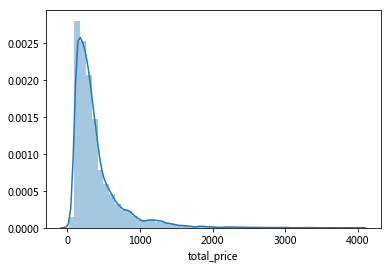

In [20]:
# 绘制 total_rice 的频率直方图
sns.distplot(house_train['total_price'])

In [21]:
print("偏态系数: %f" % house_train['total_price'].skew())
print("峰态系数: %f" % house_train['total_price'].kurt())

偏态系数: 3.163708
峰态系数: 15.171512


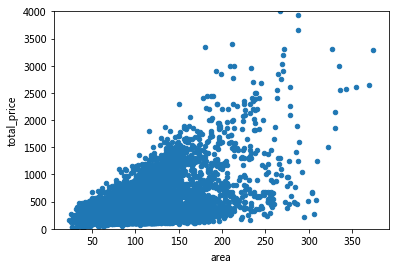

In [22]:
# Area 与 total_price的散点图
var = 'area'
data = pd.concat([house_train[var], house_train['total_price']], axis=1)
data.plot.scatter(x=var, y='total_price', ylim=(0,4000));

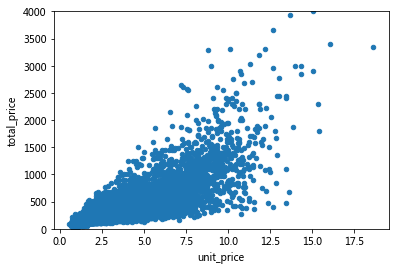

In [23]:
# unit_price 与 total_price的散点图
var = 'unit_price'
data = pd.concat([house_train[var], house_train['total_price']], axis=1)
data.plot.scatter(x=var, y='total_price', ylim=(0,4000));

### 不同种类特征之间的关系

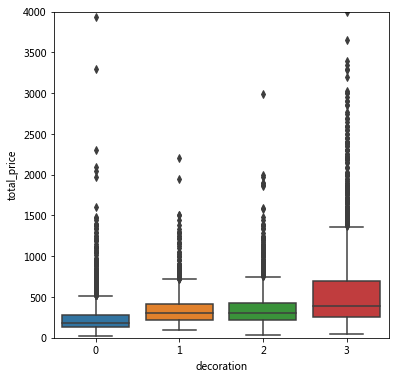

In [24]:
#箱线图 decoration/SalePrice
var = 'decoration'
data = pd.concat([house_train[var], house_train['total_price']], axis=1)
f, ax = plt.subplots(figsize=(6,6))
fig = sns.boxplot(x=var, y="total_price", data=data)
fig.axis(ymin=0, ymax=4000);

 - 绘制相关矩阵图 Correction Matrix

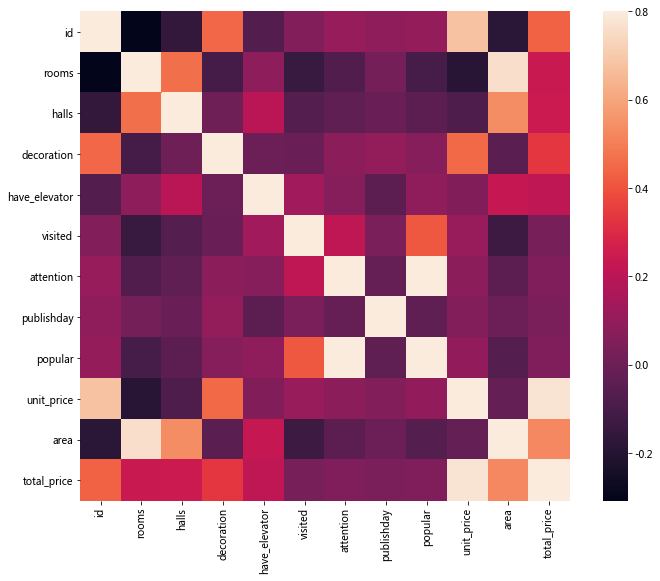

In [25]:
corrmat = house_train.corr()

f,ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

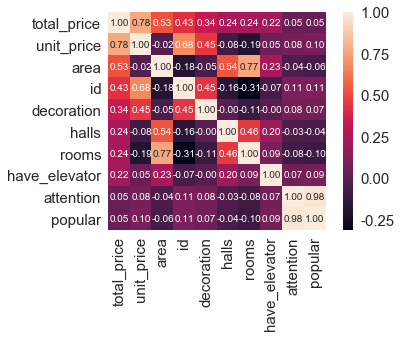

In [26]:
k = 10 #变量对于HeatMap的数值
cols = corrmat.nlargest(k, 'total_price')['total_price'].index
cm = np.corrcoef(house_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 1 to 9538
Data columns (total 15 columns):
id               8834 non-null int64
region           8834 non-null object
city             8834 non-null object
rooms            8834 non-null int64
halls            8834 non-null int64
towards          8834 non-null object
decoration       8834 non-null int64
have_elevator    8834 non-null int64
visited          8834 non-null int64
attention        8834 non-null int64
publishday       8834 non-null float64
popular          8834 non-null float64
unit_price       8834 non-null float64
area             8834 non-null float64
total_price      8834 non-null float64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.4+ MB


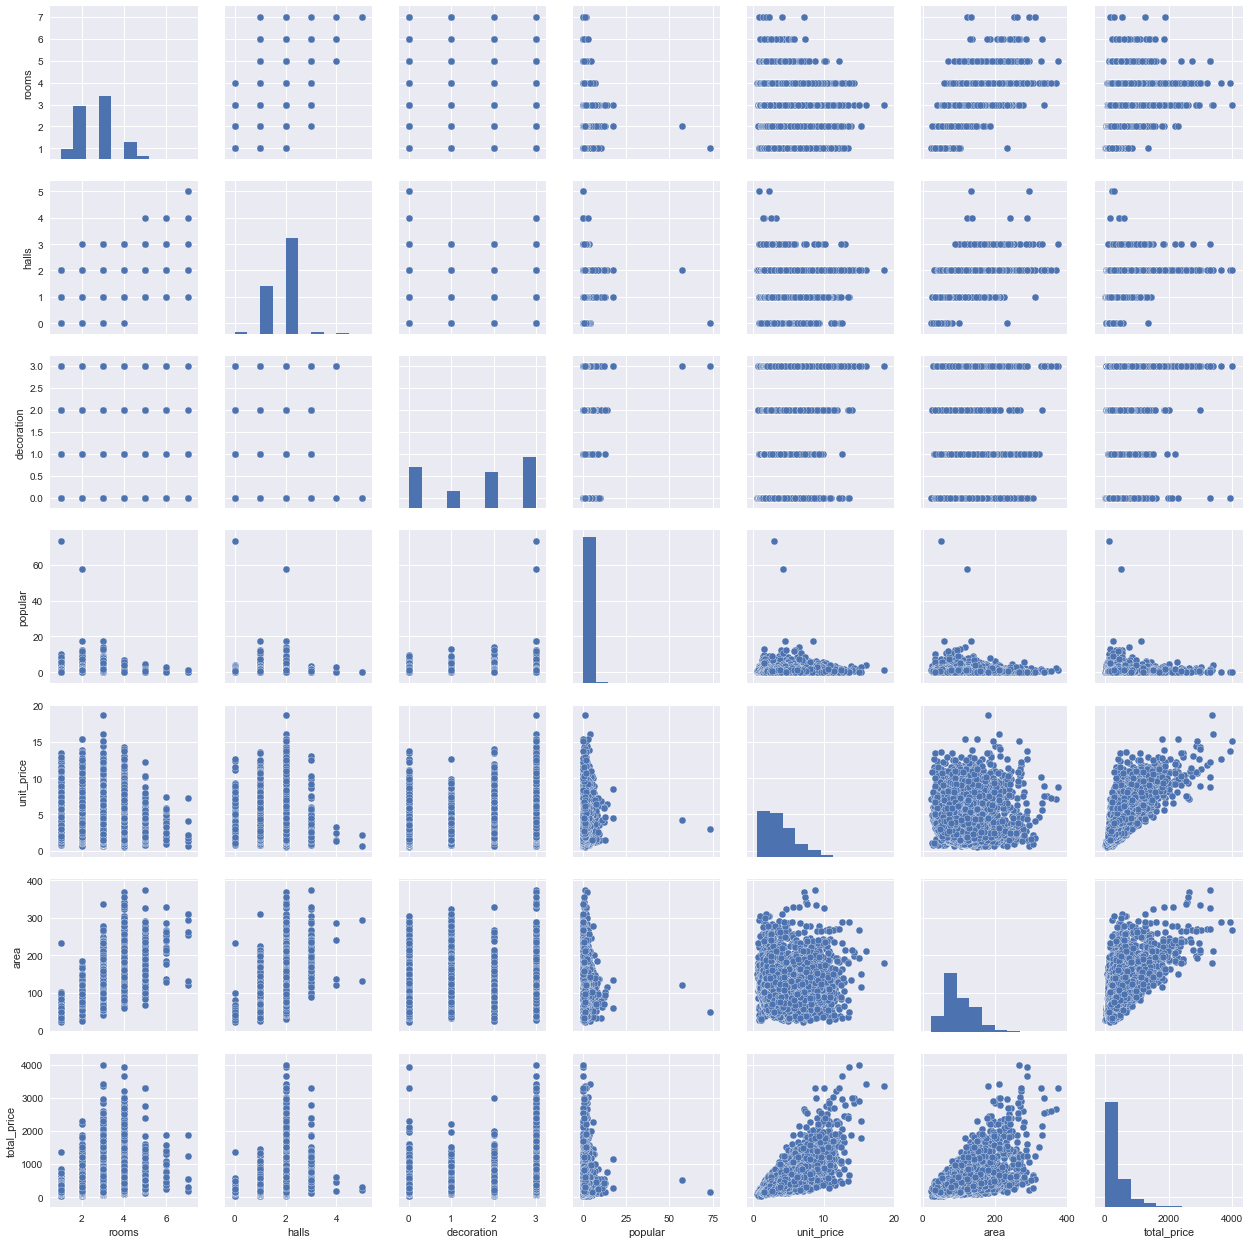

In [28]:
# 'total_price' 与相关特征的散点图
sns.set()
cols = ['city', 'rooms', 'halls', 'decoration', 'popular', 'unit_price', 'area', 'total_price']
sns.pairplot(house_train[cols], size= 2.5)
plt.show();

In [29]:
# 列表 city_list 存放各个城市房产数据信息， 一个代表个城市名称的元祖
city_list = [km, cd, hz, sh]
city_names = ("KunMing", "ChengDu", "HangZhou", "ShangHai")

In [30]:
for city,city_name in zip(city_list, city_names):
    print(city_name, city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 14 columns):
region           568 non-null object
city             568 non-null object
rooms            568 non-null int64
halls            568 non-null int64
towards          568 non-null object
decoration       568 non-null int64
have_elevator    568 non-null int64
visited          568 non-null int64
attention        568 non-null int64
publishday       568 non-null float64
popular          568 non-null float64
unit_price       568 non-null float64
area             568 non-null float64
total_price      450 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 62.2+ KB
KunMing None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 14 columns):
region           2995 non-null object
city             2995 non-null object
rooms            2995 non-null int64
halls            2995 non-null int64
towards          2995 non-null object
decorat

In [31]:
km.head()

,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
0,昆明市教工二幼儿园宿舍,K,2,2,SE NW,0,0,6,9,19.0,0.3632,1.3000,50.00,NaN
1,新亚洲体育城星宇园,K,3,2,SE,3,0,0,0,19.0,0.0000,1.3446,119.00,160.0
2,禧瑞都,K,3,2,SE,2,0,0,0,19.0,0.0000,1.1021,147.00,162.0
3,金色交响家园,K,4,2,SE,2,0,1,1,15.0,0.0667,1.4477,105.00,152.0
4,金碧阳光商住楼,K,3,2,S N,0,0,1,3,19.0,0.0842,1.8196,129.15,235.0


In [32]:
cd.tail()

,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
2990,龙华北路9号,C,1,1,S,0,0,0,25,18.5,0.4054,1.5500,51.10,79.2
2991,远鸿方程式,C,1,1,W,0,1,0,30,18.5,0.4865,1.9597,52.05,102.0
2992,欧苑,C,2,2,W,0,1,2,97,18.5,1.6486,1.2277,87.97,108.0
2993,牡丹御园,C,1,1,E,3,0,4,36,18.5,0.7351,1.6671,49.79,NaN
2994,四道街3号,C,2,1,W,0,0,2,28,18.5,0.5297,1.7011,83.48,142.0


In [33]:
hz.tail()

,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
2988,亲亲家园一期,H,4,3,S N,3,0,0,6,23.0,0.0783,2.7059,170.00,460.0
2989,天阳九筑,H,5,2,S,3,1,0,0,23.0,0.0000,3.8459,135.21,520.0
2990,西溪蝶园二期,H,3,2,E,3,1,0,4,23.0,0.0522,5.5709,170.53,950.0
2991,金隅观澜时代天筑,H,4,2,SE S,3,1,0,1,23.0,0.0130,3.1810,136.75,435.0
2992,竹海水韵,H,3,2,S N,3,1,0,16,22.0,0.2182,2.4686,88.31,218.0


In [34]:
sh.tail()

,region,city,rooms,halls,towards,decoration,have_elevator,visited,attention,publishday,popular,unit_price,area,total_price
2978,前哨路198弄,S,2,1,S,1,0,4,43,19.2,0.8177,2.6810,71.99,193.0
2979,保利西子湾,S,2,2,S,3,1,1,18,19.2,0.3177,3.9273,90.14,354.0
2980,金沙鼎苑,S,2,2,S N,1,0,21,24,19.2,1.1406,3.8193,77.24,295.0
2981,誉品原墅,S,4,2,S,2,0,0,20,19.2,0.3125,4.5806,181.20,830.0
2982,东方丽景,S,2,2,S,3,1,1,66,19.2,1.0677,6.1422,98.50,605.0


### 直方图：各个城市的房屋面积分布

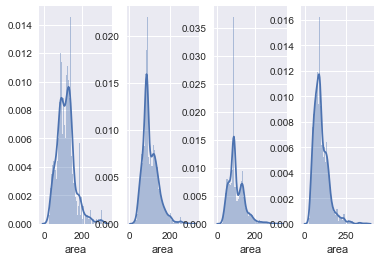

In [35]:
## 房产 area 分布可视化（柱状图）
fig=plt.figure()
fig.add_subplot(1,4,1)
sns.distplot(km['area'], bins=50, kde=True, hist=True)  # kde表示分布曲线图,hist表示直方图
fig.add_subplot(1,4,2)
sns.distplot(cd['area'], bins=50, kde=True, hist=True)  # kde表示分布曲线图,hist表示直方图
fig.add_subplot(1,4,3)
sns.distplot(hz['area'], bins=50, kde=True, hist=True)  # kde表示分布曲线图,hist表示直方图
fig.add_subplot(1,4,4)
sns.distplot(sh['area'], bins=50, kde=True, hist=True)  # kde表示分布曲线图,hist表示直方图

plt.show()

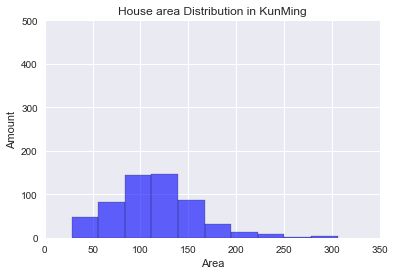

In [36]:
plt.hist(km.area, bins=10, density=0, facecolor="blue", edgecolor="black", alpha=0.6)
# 设置title，xlabel， ylabel
plt.title("House area Distribution in KunMing")
plt.xlim(0, 350)
plt.ylim(0, 500)
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

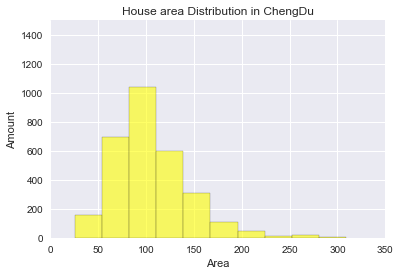

In [37]:
plt.hist(cd.area, bins=10, density=0, facecolor="yellow", edgecolor="black", alpha=0.6)
# 设置title，xlabel， ylabel
plt.title("House area Distribution in ChengDu")
plt.xlim(0, 350)
plt.ylim(0, 1500)
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

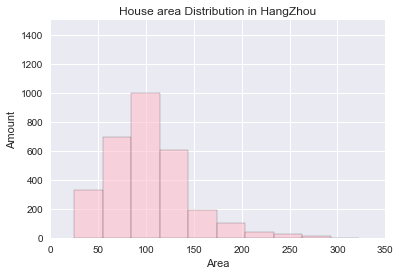

In [38]:
plt.hist(hz.area, bins=10, density=0, facecolor="pink", edgecolor="black", alpha=0.6)
# 设置title，xlabel， ylabel
plt.title("House area Distribution in HangZhou")
plt.xlim(0, 350)
plt.ylim(0, 1500)
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

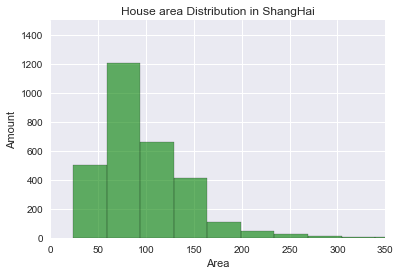

In [39]:
plt.hist(sh.area, bins=10, density=0, facecolor="green", edgecolor="black", alpha=0.6)
# 设置title，xlabel， ylabel
plt.title("House area Distribution in ShangHai")
plt.xlim(0, 350)
plt.ylim(0, 1500)
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

### 饼图：4个城市房产朝向的饼图

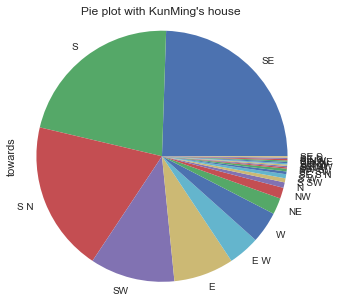

In [40]:
# 昆明
km.towards.value_counts().plot(kind='pie', figsize=(5,5));
plt.title("Pie plot with KunMing's house")
plt.axis("equal")
plt.show()

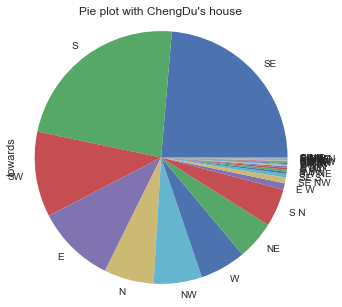

In [41]:
# 成都
cd.towards.value_counts().plot(kind='pie', figsize=(5,5));
plt.title("Pie plot with ChengDu's house")
plt.axis("equal")
plt.show()

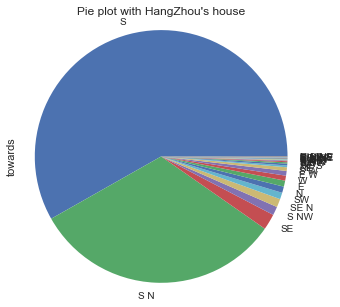

In [42]:
# 杭州
hz.towards.value_counts().plot(kind='pie', figsize=(5,5));
plt.title("Pie plot with HangZhou's house")
plt.axis("equal")
plt.show()

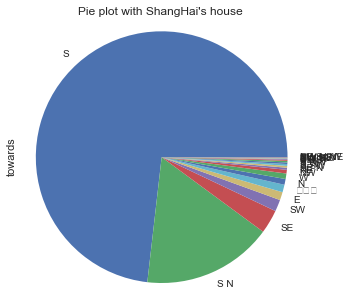

In [43]:
# 上海
sh.towards.value_counts().plot(kind='pie', figsize=(5,5));
plt.title("Pie plot with ShangHai's house")
plt.axis("equal")
plt.show()

 - 4个城市房屋面积与总价的散点图

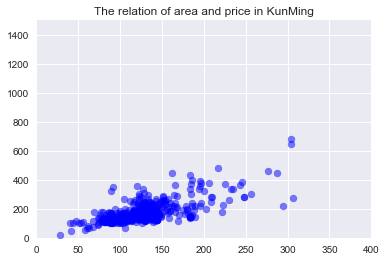

In [44]:
plt.xlim(0, 400)
plt.ylim(0, 1500)

plt.scatter(km.area, km.total_price, c='blue', alpha=0.5)
plt.title("The relation of area and price in KunMing")
plt.show()

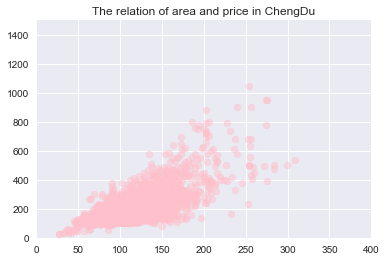

In [45]:
plt.xlim(0, 400)
plt.ylim(0, 1500)

plt.scatter(cd.area, cd.total_price, c='pink', alpha=0.5)
plt.title("The relation of area and price in ChengDu")
plt.show()

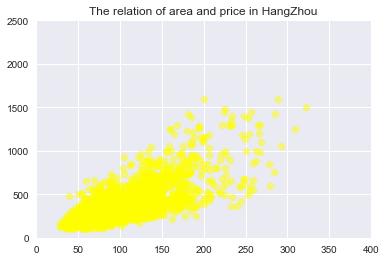

In [46]:
plt.xlim(0, 400)
plt.ylim(0, 2500)

plt.scatter(hz.area, hz.total_price, c='yellow', alpha=0.5)
plt.title("The relation of area and price in HangZhou")
plt.show()

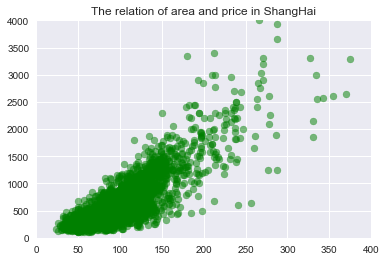

In [47]:
plt.xlim(0, 400)
plt.ylim(0, 4000)

plt.scatter(sh.area, sh.total_price, c='green', alpha=0.5)
plt.title("The relation of area and price in ShangHai")
plt.show()

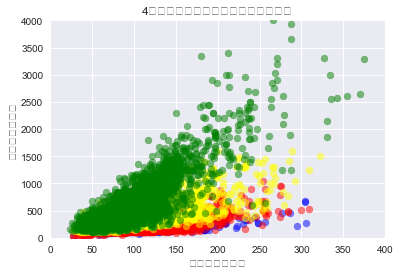

In [48]:
# 房屋面积与总价分布散点图 
plt.xlim(0, 400)
plt.ylim(0, 4000)

plt.scatter(km.area, km.total_price, c='blue', alpha=0.5)    # 昆明
plt.scatter(cd.area, cd.total_price, c='red', alpha=0.5)     # 成都
plt.scatter(hz.area, hz.total_price, c='yellow', alpha=0.5)  # 杭州
plt.scatter(sh.area, sh.total_price, c='green', alpha=0.5)   # 上海
plt.title("4个城市二手房面积与总价分布散点图")
plt.xlabel("房屋面积：平米")
plt.ylabel("房屋价格：万元")
plt.show()